In [16]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12245, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12245 (delta 5), reused 9 (delta 4), pack-reused 12229
Receiving objects: 100% (12245/12245), 11.94 MiB | 22.20 MiB/s, done.
Resolving deltas: 100% (8475/8475), done.
/content/yolov5/yolov5
Setup complete. Using torch 1.11.0+cu113 (CPU)


In [17]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [18]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
rf = Roboflow(api_key="WaVBtT3X2vhEsnb75qaD")
project = rf.workspace("sid-shawc").project("yologood")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/YoloGood-1 in yolov5pytorch:: 100%|██████████| 49/49 [00:00<00:00, 1751.19it/s]


In [5]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/YoloGood-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degre

In [6]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/YoloGood-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/2 /content/datasets/YoloGood-1/valid/images/3--14-_JPG.rf.4cce531ad62cf438781e370bb3daa9b2.jpg: 416x416 2 good-insulators, Done. (0.205s)
image 2/2 /content/datasets/YoloGood-1/valid/images/3--15-_JPG.rf.080cc4c82e79067235d01f18a1445d54.jpg: 416x416 1 good-insulator, Done. (0.178s)
Speed: 1.2ms pre-process, 191.3ms inference, 1.0ms NMS per image at shape (1, 3, 416,

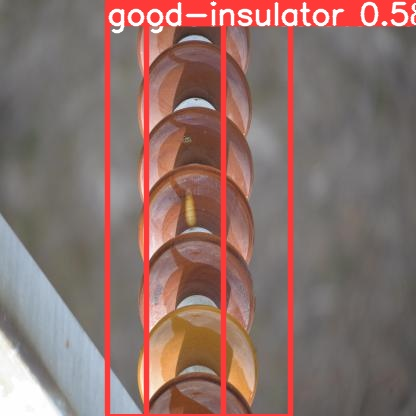

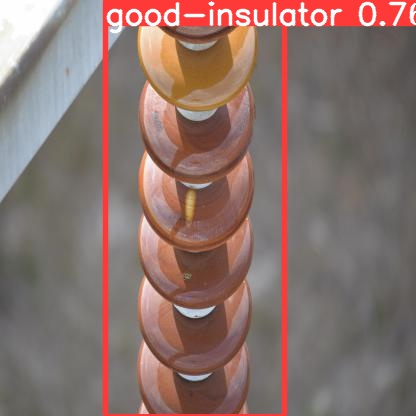

In [7]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i < 4:
      display(Image(filename=imageName))
      print("\n")

In [5]:
rf = Roboflow(api_key="WaVBtT3X2vhEsnb75qaD")
project = rf.workspace("sid-shawc").project("yolobroken")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/YoloBroken-2 in yolov5pytorch:: 100%|██████████| 49/49 [00:00<00:00, 1651.61it/s]


In [6]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/YoloBroken-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, deg

In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/YoloBroken-2/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/3 /content/datasets/YoloBroken-2/valid/images/1--1-_JPG.rf.fccb665987cb94333dddbd5be69816b6.jpg: 416x416 1 broken-insulator, Done. (0.181s)
image 2/3 /content/datasets/YoloBroken-2/valid/images/1--28-_JPG.rf.55f6274c5a9cca8a7e27131f592fcf87.jpg: 416x416 8 broken-insulators, Done. (0.186s)
image 3/3 /content/datasets/YoloBroken-2/valid/images/1--29-_JPG.rf.c49f0abc

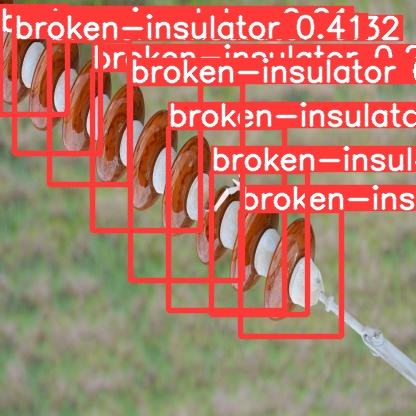

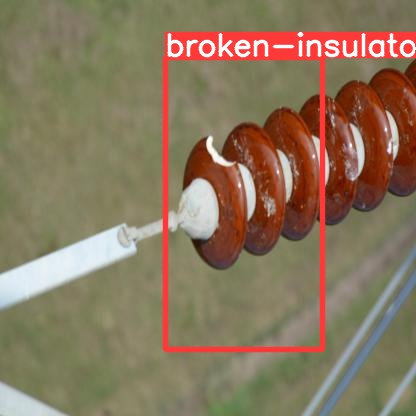

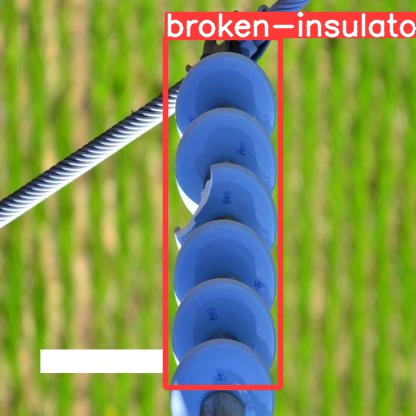

In [10]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i < 3:
      display(Image(filename=imageName))
      print("\n")

In [19]:
rf = Roboflow(api_key="WaVBtT3X2vhEsnb75qaD")
project = rf.workspace("sid-shawc").project("yoloflash")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/YoloFlash-1 in yolov5pytorch:: 100%|██████████| 45/45 [00:00<00:00, 1356.45it/s]


In [20]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/YoloFlash-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

In [21]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/YoloFlash-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
image 1/3 /content/datasets/YoloFlash-1/valid/images/2--10-_jpg.rf.4945d943c500e7091cbea5fe1189786d.jpg: 416x416 Done. (0.207s)
image 2/3 /content/datasets/YoloFlash-1/valid/images/2--19-_jpg.rf.22ce2e8178b89ca12a923561c8b45def.jpg: 416x416 Done. (0.171s)
image 3/3 /content/datasets/YoloFlash-1/valid/images/2--4-_jpg.rf.12e3f86c3dc85465bb7b9b4a771f2fd5.jpg: 416x416 Done. (

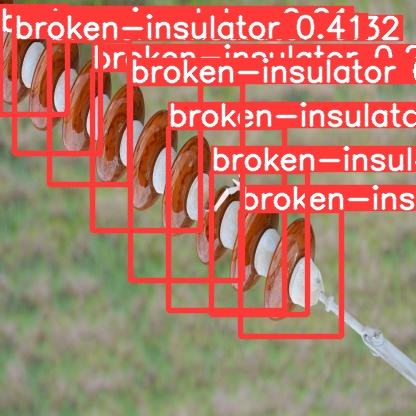

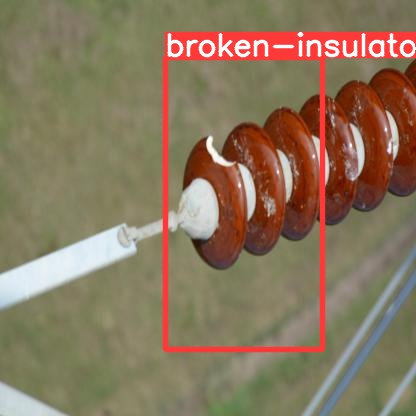

In [23]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i < 3:
      display(Image(filename=imageName))
      print("\n")